In [1]:
# Remember to update your path
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('C:/Linux_home/Qishi/QishiQR')

from pathlib import Path

from Backtesting.Vectorized.cross_compare import *
from Backtesting.Vectorized.models import *

from Utils.lm import gen_strategy, LM_model
from Utils.MajorContract_split import MajorContracts

import json
import warnings
warnings.filterwarnings(action='ignore')

# ====== Initial Configuration ========

try:
    with open('config.json','r') as f:
        config = json.load(f)
except:
    print("Failed to find the configuration file.")
        
DATA_DIR = config['Tick path']
OUTPUT_DIR = config['Output path']
Strategy_DIR = config['Strategy path']
Major_DIR = config['Major path']
model_order = config['Max model order']
number_of_states = config['State number']
freq = config['Frequency']
offset = config['Offset']
tca = None

# Rb
## Build time series of Major contracts

In [2]:
bu_mj = MajorContracts(symbol='rb', split_time='2016-7-1', topdir='C:/Linux_home/Qishi/tick2016', 
                       maturity={'1605':['2015-11-1','2016-4-1'], 
                                 '1610':['2016-2-1','2016-8-1'], 
                                 '1701':['2016-6-1','2016-11-15'],
                                 '1705':['2016-10-15','2017-1-31']}, 
                       transitions={'1605':'2016-2-1', '1610':'2016-7-1', '1701':'2016-11-1', '1705':'2017-1-1' },
                       freq=freq, offset=offset)
df_bu_train, df_bu_test, ptb = bu_mj.create_major_overlap()

# Save files
for contract in ['1605', '1610']:
    ptb[contract].to_csv(Strategy_DIR+'/Rb_major'+contract +'_' +str(freq) + '_' + str(offset) + '.csv', index=True)
df_bu_train.to_csv(Major_DIR+'/Rb_major_train'+'_' +str(freq) + '_' + str(offset) + '.csv', index=True)
df_bu_test.to_csv(Major_DIR+'/Rb_major_test'+'_' +str(freq) + '_' + str(offset) + '.csv', index=True)
    
    

rb1605 C:/Linux_home/Qishi/tick2016/rb
ID trade_range transition_begin transition_end
1605 ['2015-11-1', '2016-4-1'] 2016-01-01 00:00:00 2016-02-01 00:00:00
probability table:  20160104.0 20160129.0
rb1610 C:/Linux_home/Qishi/tick2016/rb
ID trade_range transition_begin transition_end
1610 ['2016-2-1', '2016-8-1'] 2016-02-01 00:00:00 2016-07-01 00:00:00
probability table:  20160201.0 20160630.0
rb1701 C:/Linux_home/Qishi/tick2016/rb
ID trade_range transition_begin transition_end
1701 ['2016-6-1', '2016-11-15'] 2016-07-01 00:00:00 2016-11-01 00:00:00
rb1705 C:/Linux_home/Qishi/tick2016/rb
ID trade_range transition_begin transition_end
1705 ['2016-10-15', '2017-1-31'] 2016-11-01 00:00:00 2016-12-31 00:00:00


In [3]:
strategy = list(ptb.values())
slm = pd.concat(strategy).groupby(['prior']).sum().reset_index()
slm['signal'] = slm.loc[:, '0':'2'].idxmax(axis=1)

## test on rb1610

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.250529,0.008120,-0.002670,0.001641,0.000210,-0.034775,0.014478,-0.059496,0.614630,8.102734,2476,1.519672,0.623990
1,0.248758,0.008046,-0.002650,0.001635,0.000203,-0.034775,0.014478,-0.057458,0.617058,8.085896,2540,1.514926,0.611417
2,0.219870,0.008180,-0.002800,0.001641,0.000204,-0.036859,0.023573,-0.045022,0.586105,9.300748,2562,1.523507,0.591335
3,0.249501,0.007914,-0.002391,0.001907,0.000205,-0.031036,0.023573,-0.042624,0.797645,7.929468,2469,1.506474,0.546780
4,0.290880,0.006604,-0.002535,0.001849,0.000175,-0.029402,0.023573,-0.077937,0.729328,5.675906,2420,1.422658,0.560744
5,0.291886,0.004301,-0.002458,0.001983,0.000111,-0.020737,0.024469,-0.146751,0.806455,3.683897,2482,1.275271,0.497583
6,0.299151,0.001101,-0.002270,0.001992,0.000026,-0.024427,0.024469,-0.143712,0.877841,0.920457,2662,1.070491,0.421112


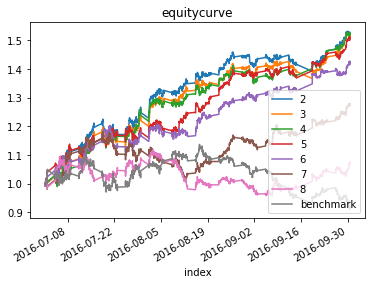

In [4]:
from Backtesting.Vectorized.models import OneContractTest

start = '20160701'
end = '20161001'
max_order=7
tcas = ['None']*max_order

test1 = OneContractTest(DATA_DIR, OUTPUT_DIR,slm)
test1.build('rb', '1610', max_order, freq, offset, start, end, tcas)

test1.run()
test1.plot()
test1.results[0]['benchmark'].plot()
plt.legend()
test1.performance

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.488262,0.024240,-0.003220,0.003186,0.000976,-0.015192,0.013452,-0.022867,0.989392,12.411182,149,1.145438,0.530201
1,0.445373,0.006237,-0.003287,0.003204,0.000214,-0.013452,0.015539,-0.062839,0.974729,3.500725,175,1.037419,0.365714
2,0.264400,0.002031,-0.003711,0.002941,0.000078,-0.011992,0.011949,-0.036529,0.792472,1.920556,156,1.012187,0.269231
3,0.276244,-0.001303,-0.003522,0.003012,-0.000045,-0.008478,0.013337,-0.054510,0.855333,-1.179568,175,0.992180,0.245714
4,0.348492,0.004130,-0.002822,0.003185,0.000116,-0.008900,0.009394,-0.032199,1.128440,2.962821,214,1.024780,0.210280
5,0.188459,0.007216,-0.002886,0.003535,0.000188,-0.009882,0.012476,-0.024638,1.225086,9.572494,230,1.043297,0.173913
6,0.129182,-0.014426,-0.003159,0.002317,-0.000446,-0.012476,0.009882,-0.107105,0.733458,-27.918539,194,0.913442,0.123711


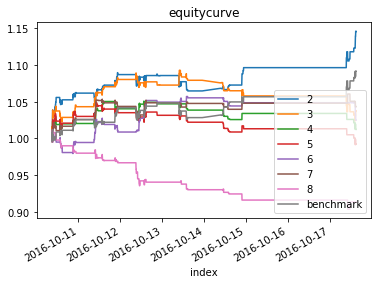

In [6]:
start = '20161001'
end = '20161231'
max_order=7
tcas = ['None']*max_order

test1 = OneContractTest(DATA_DIR, OUTPUT_DIR,slm)
test1.build('rb', '1610', max_order, freq, offset, start, end, tcas)

test1.run()

test1.plot()
test1.results[0]['benchmark'].plot()
plt.legend()
test1.performance

## Test on rb major contracts

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.428163,0.007964,-0.003969,0.002220,0.000210,-0.040607,0.019783,-0.070427,0.559398,4.650285,2273,1.477859,0.643643
1,0.410491,0.008643,-0.003910,0.002247,0.000225,-0.040607,0.019783,-0.063572,0.574597,5.263990,2305,1.518596,0.634707
2,0.416093,0.005214,-0.004311,0.002183,0.000138,-0.040607,0.019783,-0.089083,0.506426,3.132784,2273,1.312847,0.620766
3,0.412464,0.005569,-0.003850,0.002524,0.000155,-0.040607,0.025024,-0.098828,0.655557,3.375429,2152,1.334138,0.580390
4,0.415552,0.003064,-0.003925,0.002430,0.000084,-0.041752,0.020035,-0.087395,0.619034,1.843568,2183,1.183864,0.578562
5,0.482265,-0.000537,-0.003711,0.002611,-0.000014,-0.044452,0.025024,-0.167438,0.703596,-0.278249,2230,0.967794,0.513901
6,0.450696,0.002036,-0.003336,0.002810,0.000050,-0.040607,0.028634,-0.117724,0.842291,1.129623,2421,1.122188,0.451466


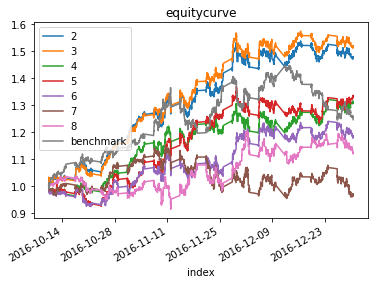

In [7]:
start = '20161001'
end = '20161231'
max_order=7
tcas = ['None']*max_order

test3 = MajorSeriesTest(df_bu_test, OUTPUT_DIR,slm)
test3.build( max_order, offset, start, end, tcas)

test3.run()

test3.plot()
test3.results[0]['benchmark'].plot()
plt.legend()
test3.performance

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.352023,0.007742,-0.003450,0.001948,0.000203,-0.040607,0.019783,-0.073578,0.564523,5.498352,4727,1.960031,0.640152
1,0.345201,0.008023,-0.003414,0.001959,0.000207,-0.040607,0.019783,-0.081601,0.573824,5.810239,4813,1.994829,0.630168
2,0.341014,0.006334,-0.003670,0.001940,0.000165,-0.040607,0.019783,-0.065411,0.528624,4.643737,4774,1.785455,0.611018
3,0.349868,0.005201,-0.003210,0.002219,0.000142,-0.040607,0.025024,-0.082604,0.691225,3.716292,4541,1.644906,0.564193
4,0.351750,0.004614,-0.003309,0.002158,0.000125,-0.041752,0.025136,-0.081816,0.652265,3.279568,4565,1.572179,0.573932
5,0.386964,0.003291,-0.003154,0.002335,0.000087,-0.044452,0.025136,-0.120975,0.740397,2.126167,4683,1.408084,0.513773
6,0.372717,0.002661,-0.002912,0.002473,0.000066,-0.040607,0.028634,-0.123962,0.849250,1.785174,5028,1.330021,0.445505


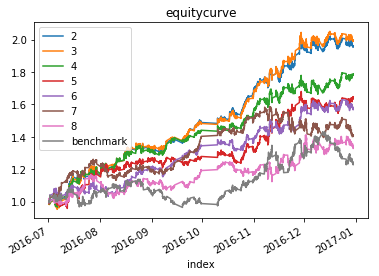

In [8]:
start = '20160601'
end = '20161231'
max_order=7
tcas = ['Fixed']*max_order

test4 = MajorSeriesTest(df_bu_test, OUTPUT_DIR,slm)
test4.build( max_order, offset, start, end, tcas)

test4.run()

test4.plot()
test4.results[0]['benchmark'].plot()
plt.legend()
test4.performance